In [1]:
# Importing relevant libraries and dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

#fangraphs data
#MLB data
#baseball savant https://baseballsavant.mlb.com/csv-docs
#Kaggle https://www.kaggle.com/datasets/josephvm/mlb-game-data


#BaseballRef  https://www.baseball-reference.com/leagues/majors/2022.shtml
br_2016_batting = pd.read_csv('data/br_2016_batting.csv')
br_2016_fielding = pd.read_csv('data/br_2016_fielding.csv')
br_2016_pitching = pd.read_csv('data/br_2016_pitching.csv')
br_2016_standings = pd.read_csv('data/br_2016_standings.csv')
br_2016_war = pd.read_csv('data/br_2016_wins_replacment.csv')
br_2017_batting = pd.read_csv('data/br_2017_batting.csv')
br_2017_fielding = pd.read_csv('data/br_2017_fielding.csv')
br_2017_pitching = pd.read_csv('data/br_2017_pitching.csv')
br_2017_standings = pd.read_csv('data/br_2017_standings.csv')
br_2017_war = pd.read_csv('data/br_2017_wins_replacment.csv')
br_2018_batting = pd.read_csv('data/br_2018_batting.csv')
br_2018_fielding = pd.read_csv('data/br_2018_fielding.csv')
br_2018_pitching = pd.read_csv('data/br_2018_pitching.csv')
br_2018_standings = pd.read_csv('data/br_2018_standings.csv')
br_2018_war = pd.read_csv('data/br_2018_wins_replacment.csv')
br_2019_batting = pd.read_csv('data/br_2019_batting.csv')
br_2019_fielding = pd.read_csv('data/br_2019_fielding.csv')
br_2019_pitching = pd.read_csv('data/br_2019_pitching.csv')
br_2019_standings = pd.read_csv('data/br_2019_standings.csv')
br_2019_war = pd.read_csv('data/br_2019_wins_replacment.csv')
br_2020_batting = pd.read_csv('data/br_2020_batting.csv')
br_2020_fielding = pd.read_csv('data/br_2020_fielding.csv')
br_2020_pitching = pd.read_csv('data/br_2020_pitching.csv')
br_2020_standings = pd.read_csv('data/br_2020_standings.csv')
br_2020_war = pd.read_csv('data/br_2020_wins_replacment.csv')
br_2021_batting = pd.read_csv('data/br_2021_batting.csv')
br_2021_fielding = pd.read_csv('data/br_2021_fielding.csv')
br_2021_pitching = pd.read_csv('data/br_2021_pitching.csv')
br_2021_standings = pd.read_csv('data/br_2021_standings.csv')
br_2021_war = pd.read_csv('data/br_2021_wins_replacment.csv')
br_2022_batting = pd.read_csv('data/br_2022_batting.csv')
br_2022_fielding = pd.read_csv('data/br_2022_fielding.csv')
br_2022_pitching = pd.read_csv('data/br_2022_pitching.csv')
br_2022_standings = pd.read_csv('data/br_2022_standings.csv')
br_2022_war = pd.read_csv('data/br_2022_wins_replacment.csv')


pd.set_option('max_columns', None)

In [2]:
df_2022 = br_2022_standings.merge(br_2022_batting, on ='Tm').merge(br_2022_pitching, on ='Tm').merge(br_2022_fielding, on ='Tm')
df_2021 = br_2021_standings.merge(br_2021_batting, on ='Tm').merge(br_2021_pitching, on ='Tm').merge(br_2021_fielding, on ='Tm')
df_2020 = br_2020_standings.merge(br_2020_batting, on ='Tm').merge(br_2020_pitching, on ='Tm').merge(br_2020_fielding, on ='Tm')
df_2019 = br_2019_standings.merge(br_2019_batting, on ='Tm').merge(br_2019_pitching, on ='Tm').merge(br_2019_fielding, on ='Tm')
df_2018 = br_2018_standings.merge(br_2018_batting, on ='Tm').merge(br_2018_pitching, on ='Tm').merge(br_2018_fielding, on ='Tm')
df_2017 = br_2017_standings.merge(br_2017_batting, on ='Tm').merge(br_2017_pitching, on ='Tm').merge(br_2017_fielding, on ='Tm')
df_2016 = br_2016_standings.merge(br_2016_batting, on ='Tm').merge(br_2016_pitching, on ='Tm').merge(br_2016_fielding, on ='Tm')

In [3]:
df = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022], ignore_index=True)
df

,Rk,Tm,W_x,L_x,W-L%_x,R_x,RA,Rdiff,SOS,SRS,pythWL,Luck,vEast,vCent,vWest,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,#Bat,BatAge,R/G,G_x,PA,AB,R_y,H_x,2B,3B,HR_x,RBI,SB,CS,BB_x,SO_x,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP_x,SH,SF,IBB_x,LOB_x,#P,PAge,RA/G_x,W_y,L_y,W-L%_y,ERA,G_y,GS_x,GF,CG_x,tSho,cSho,SV,IP,H_y,R,ER,HR_y,BB_y,IBB_y,SO_y,HBP_y,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y,#Fld,RA/G_y,DefEff,G,GS_y,CG_y,Inn,Ch,PO,A,E,DP,Fld%,Rtot,Rtot/yr,Rdrs,Rdrs/yr,Rgood,Strk,last10,last20,last30
0,1.0,Chicago Cubs,103,58,0.640,5.0,3.4,1.6,-0.2,1.3,107-54,-4.0,19-14,50-25,19-14,15-5,57-24,46-34,9-4,22-23,75-41,28-17,31-25,72-33,45,27.4,4.99,162,6335,5503,808,1409,293,30,199,767,66,34,656,1339,0.256,0.343,0.429,0.772,104,2359,107,96,42,37,45,1217,26,29.9,3.43,103,58,0.640,3.15,162,162,157,5,15,2,38,1459.2,1125,556,511,163,495,24,1441,63,0,80,5933,133,3.77,1.110,6.9,1.0,3.1,8.9,2.91,998,45,3.43,0.728,162,1458,1017,13137.0,6115,4379,1635,101,116,0.983,95,9,107,1,-2,NaN,NaN,NaN,NaN
1,2.0,Washington Nationals,95,67,0.586,4.7,3.8,0.9,-0.3,0.6,97-65,-2.0,51-25,17-16,15-18,12-8,50-31,45-36,5-8,26-19,75-53,20-14,31-29,64-38,43,28.8,4.71,162,6201,5490,763,1403,268,29,203,735,121,39,536,1252,0.256,0.326,0.426,0.751,96,2338,102,64,48,63,49,1105,24,29.1,3.78,95,67,0.586,3.51,162,162,161,1,12,0,46,1459.2,1272,612,570,155,468,43,1476,57,4,47,6036,122,3.58,1.192,7.8,1.0,2.9,9.1,3.15,1044,42,3.78,0.700,162,1458,1147,13137.0,5877,4379,1425,73,142,0.988,49,4,2,0,3,NaN,NaN,NaN,NaN
2,3.0,Texas Rangers,95,67,0.586,4.7,4.7,0.0,0.1,0.2,82-80,13.0,16-17,19-14,47-29,13-7,53-28,42-39,6-6,36-11,73-48,22-19,60-31,35-36,52,28.4,4.72,162,6089,5525,765,1446,257,23,215,746,99,36,436,1220,0.262,0.322,0.433,0.755,96,2394,114,70,18,40,23,1038,31,28.8,4.67,95,67,0.586,4.37,162,162,161,1,6,0,56,1443.0,1441,757,700,201,534,16,1154,53,5,45,6186,104,4.58,1.369,9.0,1.3,3.3,7.2,2.16,1100,52,4.67,0.692,162,1458,1105,12987.0,6081,4329,1655,97,190,0.984,47,4,2,0,4,NaN,NaN,NaN,NaN
3,4.0,Cleveland Indians,94,67,0.584,4.8,4.2,0.6,0.0,0.6,91-70,3.0,14-18,49-26,18-16,13-7,53-28,41-39,6-6,28-21,63-47,31-20,48-43,46-24,48,29.0,4.83,161,6155,5484,777,1435,308,29,185,733,134,31,531,1246,0.262,0.329,0.430,0.759,96,2356,137,49,31,60,16,1084,27,28.1,4.20,94,67,0.584,3.84,161,161,156,5,11,3,37,1445.0,1330,676,617,186,461,34,1398,34,7,49,6033,118,3.91,1.239,8.3,1.2,2.9,8.7,3.03,1022,48,4.20,0.696,161,1449,1032,13005.0,6032,4335,1608,89,126,0.985,68,6,41,0,-2,NaN,NaN,NaN,NaN
4,5.0,Boston Red Sox,93,69,0.574,5.4,4.3,1.1,0.1,1.3,98-64,-5.0,43-33,15-18,21-12,14-6,47-34,46-35,7-4,20-24,73-52,20-17,55-48,38-21,50,28.5,5.42,162,6320,5670,878,1598,343,25,208,836,83,24,558,1160,0.282,0.348,0.461,0.810,112,2615,137,43,8,40,34,1162,26,29.0,4.28,93,69,0.574,4.00,162,162,153,9,5,1,43,1439.2,1342,694,640,176,490,16,1362,65,0,52,6073,112,4.00,1.273,8.4,1.1,3.1,8.5,2.78,1060,50,4.28,0.695,162,1458,1143,12957.0,5821,4319,1427,75,139,0.987,22,2,69,0,-1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,26.0,Kansas City Royals,65,97,0.401,4.0,5.0,-1.0,0.1,-1.0,64-98,1.0,13-22,33-43,12-19,7-13,39-42,26-55,5-5,16-20,45-76,20-21,34-58,31-39,55,27.1,3.95,162,6010,5437,640,1327,247,38,138,613,104,34,460,1287,0.244,0.306,0.380,0.686,93,2064,101,48,20,44,7,1091,32,27.3,5.00,65,97,0.401,4.70,162,162,162,0,9,0,33,1416.0,1493,810,740,173,589,15,1191,71,6,88,6249,87,4.42,1.470,9.5,1.1,3.7,7.6,2.02,1204,55,5.00,0.675,162,1458,1109,12744.0,5829,4248,1499,82,153,0.986,-26,-2,-37,-1,0,L 2,3-7,8-12,12-18
206,27.0,Pittsburgh Pirates,62,100,0.383,3.6,5.0,-1.4,0.0,-1.4,58-104,4.0,9-26,35-41,14-17,4-16,34-47,28-53,4-9,21-27

In [4]:
columns_drop = df[['Tm','Rk', 'L_x', 'W-L%_x', 'pythWL', 'Luck', 'vEast', 'vCent', 'vWest', 'Inter', 'Home', 'Road', 'ExInn'
                  , '1Run', 'vRHP', 'vLHP', '≥.500', '<.500', 'W_y', 'L_y', 'W-L%_y', 'Strk', 'last10', 'last20', 'last30']]
df.drop(columns=columns_drop, inplace=True)

In [5]:
corr = df.corr()['W_x']
corr.abs().sort_values(ascending=False)[1:].head(25)

R_y      0.913614
RBI      0.912863
SO_y     0.889810
SV       0.885525
BB_x     0.881541
TB       0.875235
LOB_x    0.843564
H_x      0.842991
PA       0.835130
2B       0.827457
HR_x     0.827057
PO       0.826589
Inn      0.826588
IP       0.826542
AB       0.819379
GS_y     0.815157
G_x      0.815157
G_y      0.815157
G        0.815157
GS_x     0.815157
Ch       0.811887
GF       0.810149
BF       0.781457
SF       0.764029
CG_y     0.759621
Name: W_x, dtype: float64

In [6]:
model = df.copy()

X = model.drop('W_x', axis=1)
y = model['W_x']

y = y.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2)

#Standardized Scaler - fit to training x
scaler = StandardScaler().fit(X_train)



#training data 
X_train_trans = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)


#testing data
X_test_trans = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [8]:
regressor = LinearRegression()
reg = regressor.fit(X_train_trans, y_train)
reg.score(X_test_trans, y_test)


0.9853947782192958

In [9]:
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train_trans))

results = model.fit()
results

results.rsquared

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     397.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           8.90e-93
Time:                        15:44:42   Log-Likelihood:                -271.36
No. Observations:                 168   AIC:                             694.7
Df Residuals:                      92   BIC:                             932.1
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.2083      0.127    577.042      0.0

In [10]:
model = df.copy()

X = model[['RA', 'PA', 'R_y', 'CS', 'BA', 'TB', 'LOB_x', 'RA/G_x', 'cSho', 'R', 'IBB_y', 'BF', 'LOB_y', 'RA/G_y']]
y = model['W_x']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2)

In [11]:
regressor = LinearRegression()
reg = regressor.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9924617085608419

In [12]:
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))


results = model.fit()
results


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    W_x   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2005.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.63e-164
Time:                        15:44:53   Log-Likelihood:                -325.67
No. Observations:                 168   AIC:                             679.3
Df Residuals:                     154   BIC:                             723.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9573      5.585      1.067      0.2

In [13]:
model = df.copy()

X = model[['R_y', 'RBI', 'SO_y', 'SV', 'BA', 'BB_x', 'TB', 'LOB_x', 'H_x', 'PA', '2B', 'HR_x', 'PO', 'Inn', 'IP', 'AB']]
y = model['W_x']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
regressor = LinearRegression()
reg = regressor.fit(X_train.values, y_train.values)
reg.score(X_test, y_test)

0.9894350481771947

In [15]:
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))


results = model.fit()
results


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    W_x   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     665.7
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.45e-131
Time:                        15:44:55   Log-Likelihood:                -398.49
No. Observations:                 168   AIC:                             831.0
Df Residuals:                     151   BIC:                             884.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5153     12.982      1.734      0.0

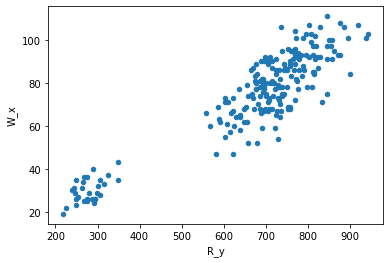

In [16]:
df.plot(kind='scatter', x='R_y', y='W_x')
plt.show()

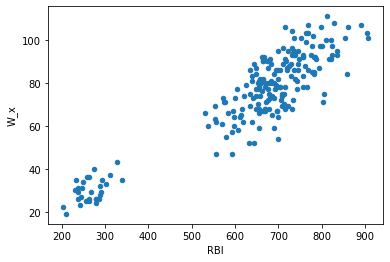

In [17]:
df.plot(kind='scatter', x='RBI', y='W_x')
plt.show()

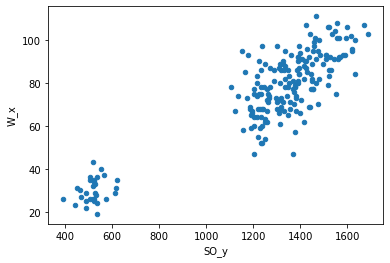

In [18]:
df.plot(kind='scatter', x='SO_y', y='W_x')
plt.show()

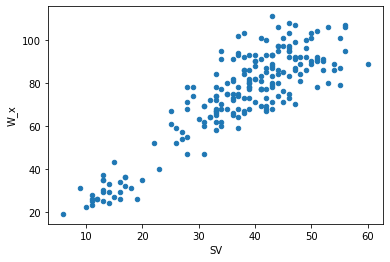

In [19]:
df.plot(kind='scatter', x='SV', y='W_x')
plt.show()

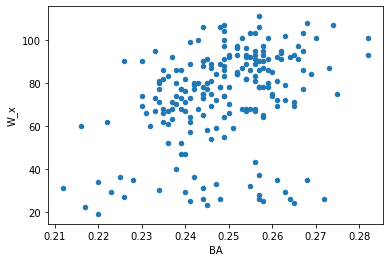

In [20]:
df.plot(kind='scatter', x='BA', y='W_x')
plt.show()

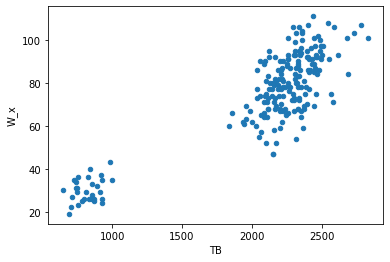

In [21]:
df.plot(kind='scatter', x='TB', y='W_x')
plt.show()

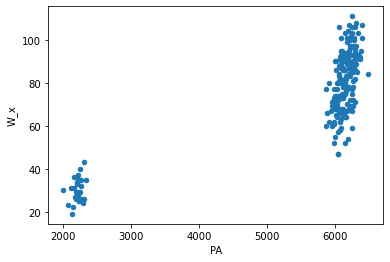

In [22]:
df.plot(kind='scatter', x='PA', y='W_x')
plt.show()